# Exploration Notebook

## Learning the Dataset

Welcome to my exploration notebook for my basketball predictions project! This is where I will take time to learn more about the master datasets I hae created; moreover, my goal is to understand more about the data than what is on the surface through summary statistic and exploratory visualization methods.

## Methods

In [94]:
# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [95]:
# load data
master_df = pd.read_csv("/Users/trustanprice/Desktop/Personal/Basketball-Predictions/data/raw/master-stats/master_df.csv")
print(master_df.head())

   Season                   Team  GP   W   L   WIN%   Min    PTS   FGM   FGA  \
0    2025  Oklahoma City Thunder  82  68  14  0.829  48.1  120.5  44.6  92.7   
1    2025  Oklahoma City Thunder  82  68  14  0.829  48.1  120.5  44.6  92.7   
2    2025  Oklahoma City Thunder  82  68  14  0.829  48.1  120.5  44.6  92.7   
3    2025    Cleveland Cavaliers  82  64  18  0.780  48.2  121.9  44.5  90.8   
4    2025    Cleveland Cavaliers  82  64  18  0.780  48.2  121.9  44.5  90.8   

   ...       SOS            Coach  Yw/Franch  YOverall  CareerW  CareerL  \
0  ...  0.487557  Mark Daigneault          5         5      211      189   
1  ...  0.487557  Mark Daigneault          5         5      211      189   
2  ...  0.487557  Mark Daigneault          5         5      211      189   
3  ...  0.479675   Kenny Atkinson          1         5      182      208   
4  ...  0.479675   Kenny Atkinson          1         5      182      208   

   CareerW%  Pk  Coach_Count      Payroll  
0     0.528  15   

I will now create the training and testing data, making the training data 2016-2023 seasons (8 seasons) and the testing data 2024/2025 seasons (2 seasons). I am doing it like this because I am predicting for the seasons to come; therefore, I am trying to replicate the traditional 80/20 split while making it a time-based split.

In [96]:
# train/test split
master_test = master_df[master_df["Season"].isin([2024, 2025])]
master_train = master_df[~master_df["Season"].isin([2024, 2025])]

print("Train shape:", master_train.shape)
print("Test shape:", master_test.shape)

Train shape: (515, 51)
Test shape: (132, 51)


In [97]:
# Numeric features (continuous or counts)
numeric_features = [
    "GP", "W", "L", "WIN%", "Min", "PTS", "FGM", "FGA", "FG%",
    "3PM", "3PA", "3P%", "FTM", "FTA", "FT%", "OREB", "DREB",
    "REB", "AST", "TOV", "STL", "BLK", "BLKA", "PF", "PFD",
    "PLUS_MINUS", "Home_W", "Home_L", "Road_W", "Road_L",
    "E_W", "E_L", "W_W", "W_L", "Pre-ASG_W", "Pre-ASG_L",
    "Post-ASG_W", "Post-ASG_L", "SOS", "Yw/Franch", "YOverall",
    "CareerW", "CareerL", "CareerW%", "Pk", "Coach_Count", "Payroll"
]

# Categorical features (labels, identifiers, strings)
categorical_features = [
    "Season", "Team", "Coach"
]

# Define target column (example: predict wins, change as needed)
target_column = "W"

### Dataset Description  

The master dataset consists of NBA team performance and front-office data from the 2016–2025 seasons. Each row represents a single team’s season, including statistical performance, coaching information, draft data, payroll, and strength of schedule. The goal is to analyze team success and build predictive models for future performance.  

---

#### Response  
**W**  
[int64] Number of regular season wins for the team in a given season.  

---

## Features  

**Season**  
[int64] The NBA season year (e.g., 2016, 2017, …, 2025).  

**Team**  
[string] Full name of the NBA team (e.g., "Boston Celtics").  

**GP**  
[int64] Number of games played in the season.  

**L**  
[int64] Number of regular season losses.  

**WIN%**  
[float64] Win percentage for the season.  

**Min**  
[float64] Average minutes per game.  

**PTS**  
[float64] Points scored per game.  

**FGM / FGA / FG%**  
[float64] Field goals made, attempted, and field goal percentage.  

**3PM / 3PA / 3P%**  
[float64] Three-pointers made, attempted, and percentage.  

**FTM / FTA / FT%**  
[float64] Free throws made, attempted, and percentage.  

**OREB / DREB / REB**  
[int64] Offensive, defensive, and total rebounds per game.  

**AST / TOV / STL / BLK / BLKA**  
[int64] Assists, turnovers, steals, blocks, and blocks against.  

**PF / PFD**  
[int64] Personal fouls committed and fouls drawn.  

**PLUS_MINUS**  
[float64] Average point differential per game.  

**Home_W / Home_L**  
[int64] Wins and losses at home.  

**Road_W / Road_L**  
[int64] Wins and losses on the road.  

**E_W / E_L / W_W / W_L**  
[int64] Wins and losses vs Eastern and Western Conference opponents.  

**Pre-ASG_W / Pre-ASG_L / Post-ASG_W / Post-ASG_L**  
[int64] Wins and losses before and after the All-Star Game.  

**SOS**  
[float64] Strength of schedule, computed as the average win% of opponents.  

**Coach**  
[string] Head coach for the team in the given season.  

**Yw/Franch**  
[int64] Years the coach has been with the franchise.  

**YOverall**  
[int64] Total years of head coaching experience.  

**CareerW / CareerL / CareerW%**  
[int64 / float64] Career wins, losses, and win percentage of the coach.  

**Pk**  
[int64] Draft pick number for the team’s highest selection that year.  

**Coach_Count**  
[int64] Number of different head coaches the team had during the season.  

**Payroll**  
[float64] Total team payroll for the season in USD.  


In [98]:
master_train.head()

,Season,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,...,SOS,Coach,Yw/Franch,YOverall,CareerW,CareerL,CareerW%,Pk,Coach_Count,Payroll
132,2023,Milwaukee Bucks,82,58,24,0.707,48.4,116.9,42.7,90.4,...,0.493024,Mike Budenholzer,5,10,484,317,0.604,58,1,182930771.0
133,2023,Boston Celtics,82,57,25,0.695,48.7,117.9,42.2,88.8,...,0.493012,Joe Mazzulla,1,1,57,25,0.695,35,1,178633307.0
134,2023,Philadelphia 76ers,82,54,28,0.659,48.5,115.2,40.8,83.8,...,0.499232,Doc Rivers,3,24,1097,763,0.590,60,1,NaN
135,2023,Denver Nuggets,82,53,29,0.646,48.2,115.8,43.6,86.4,...,0.489390,Michael Malone,8,10,406,337,0.546,40,1,162338665.0
136,2023,Cleveland Cavaliers,82,51,31,0.622,48.5,112.3,41.6,85.2,...,0.495671,J.B. Bickerstaff,4,7,207,256,0.447,49,1,151966241.0


In [99]:
master_test.head()

,Season,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,...,SOS,Coach,Yw/Franch,YOverall,CareerW,CareerL,CareerW%,Pk,Coach_Count,Payroll
0,2025,Oklahoma City Thunder,82,68,14,0.829,48.1,120.5,44.6,92.7,...,0.487557,Mark Daigneault,5,5,211,189,0.528,15,1,166418720.0
1,2025,Oklahoma City Thunder,82,68,14,0.829,48.1,120.5,44.6,92.7,...,0.487557,Mark Daigneault,5,5,211,189,0.528,24,1,166418720.0
2,2025,Oklahoma City Thunder,82,68,14,0.829,48.1,120.5,44.6,92.7,...,0.487557,Mark Daigneault,5,5,211,189,0.528,44,1,166418720.0
3,2025,Cleveland Cavaliers,82,64,18,0.780,48.2,121.9,44.5,90.8,...,0.479675,Kenny Atkinson,1,5,182,208,0.467,49,1,165110486.0
4,2025,Cleveland Cavaliers,82,64,18,0.780,48.2,121.9,44.5,90.8,...,0.479675,Kenny Atkinson,1,5,182,208,0.467,58,1,165110486.0


### Summary Statistics

In [100]:
master_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 132 to 646
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       515 non-null    int64  
 1   Team         515 non-null    object 
 2   GP           515 non-null    int64  
 3   W            515 non-null    int64  
 4   L            515 non-null    int64  
 5   WIN%         515 non-null    float64
 6   Min          515 non-null    float64
 7   PTS          515 non-null    float64
 8   FGM          515 non-null    float64
 9   FGA          515 non-null    float64
 10  FG%          515 non-null    float64
 11  3PM          515 non-null    float64
 12  3PA          515 non-null    float64
 13  3P%          515 non-null    float64
 14  FTM          515 non-null    float64
 15  FTA          515 non-null    float64
 16  FT%          515 non-null    float64
 17  OREB         515 non-null    float64
 18  DREB         515 non-null    float64
 19  REB        

In [101]:
# General descriptive statistics
summary_stats = master_train[["SOS","WIN%","Payroll","W"]].describe()
print(summary_stats)

              SOS        WIN%       Payroll           W
count  515.000000  515.000000  4.630000e+02  515.000000
mean     0.501204    0.464986  1.155440e+08   36.912621
std      0.008161    0.140445  2.619902e+07   11.413954
min      0.476200    0.122000  6.319965e+07   10.000000
25%      0.495878    0.341000  9.577484e+07   27.000000
50%      0.501205    0.476000  1.188040e+08   37.000000
75%      0.506939    0.585000  1.310238e+08   46.000000
max      0.521194    0.890000  1.929054e+08   73.000000


These first two summary statistics are just good starting points for me when I begin to dive into any type of data exploration. I often first run a .info() on the training data into a .describe() of the 3-4 surface level most important variables in the dataset.

In [102]:
# Average home vs. road wins across all teams
home_road_summary = master_train[["Home_W", "Home_L", "Road_W", "Road_L"]].mean()
print(home_road_summary)

Home_W    22.700971
Home_L    16.941748
Road_W    18.899029
Road_L    20.770874
dtype: float64


From this statistic, I can conclude that there is a definite home court advantage in the NBA from 2016-2023.

In [103]:
# Correlation between Payroll and Wins
payroll_wins_corr = master_train["Payroll"].corr(master_train["W"])
print("Correlation between Payroll and Wins (2016-2023):", payroll_wins_corr.round(4))

Correlation between Payroll and Wins (2016-2023): 0.2224


This statistic of the correlation between payroll and winning is surprising to me given how much money there is in basketball. I am curious as to how that correlation would change if it were only the starting lineups payroll.

In [104]:
# Average wins and payroll by season
season_trends = master_train.groupby("Season")[["W", "Payroll"]].mean().round(4)
print(season_trends)


              W       Payroll
Season                       
2016    37.1642  7.571012e+07
2017    37.9833  9.597241e+07
2018    36.4030  1.068879e+08
2019    39.1364  1.201279e+08
2020    33.6769  1.176560e+08
2021    33.6935  1.277310e+08
2022    38.2419  1.333089e+08
2023    38.9394  1.462979e+08


The two things I can draw from this statistic is that the average wins per season need to be adjusted because of the covid seasons and that the payroll for the league is increasing drastically.

### Exploratory Visualization

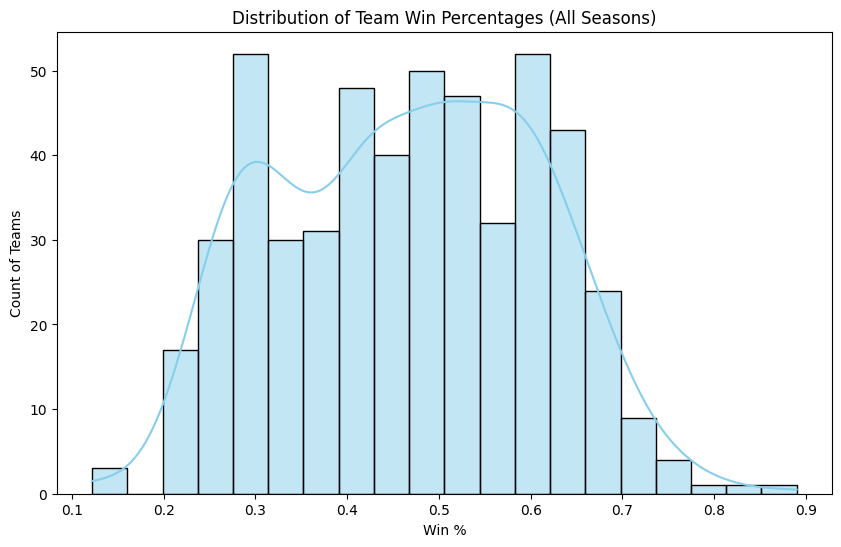

In [105]:
# Distribution of Win% Across Seasons
plt.figure(figsize=(10,6))
sns.histplot(master_train["WIN%"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Team Win Percentages (All Seasons)")
plt.xlabel("Win %")
plt.ylabel("Count of Teams")
plt.show()

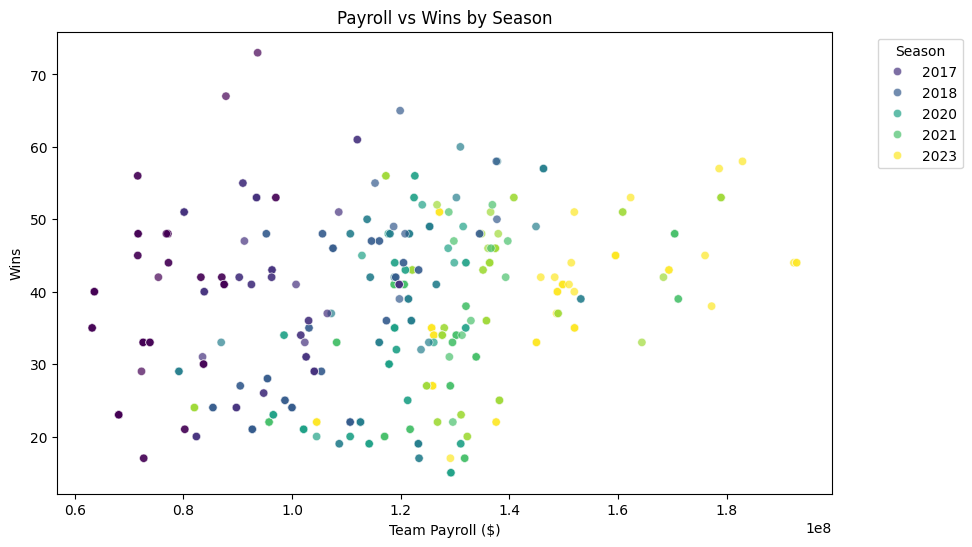

In [106]:
# Payroll vs Wins 
plt.figure(figsize=(10,6))
sns.scatterplot(data=master_train, x="Payroll", y="W", hue="Season", palette="viridis", alpha=0.7)
plt.title("Payroll vs Wins by Season")
plt.xlabel("Team Payroll ($)")
plt.ylabel("Wins")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

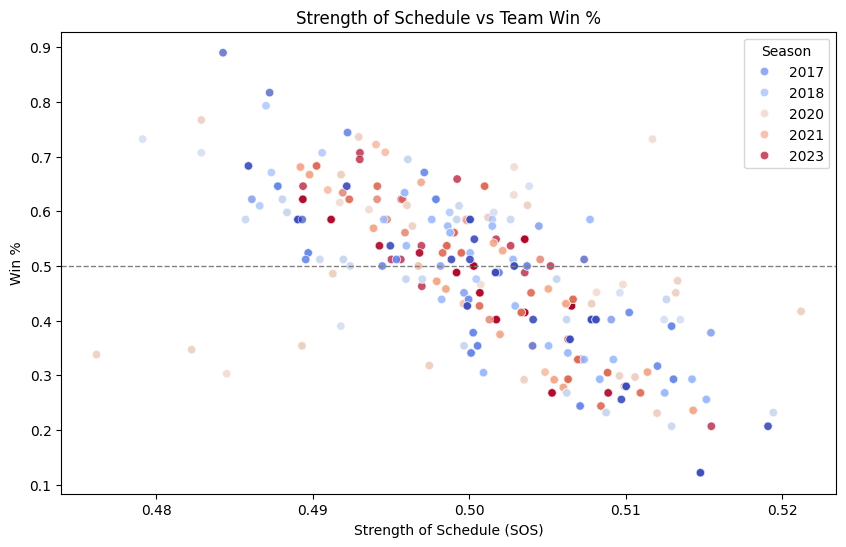

In [107]:
# Strength of Schedule vs Win%
plt.figure(figsize=(10,6))
sns.scatterplot(data=master_train, x="SOS", y="WIN%", hue="Season", palette="coolwarm", alpha=0.7)
plt.title("Strength of Schedule vs Team Win %")
plt.xlabel("Strength of Schedule (SOS)")
plt.ylabel("Win %")
plt.axhline(0.5, color="gray", linestyle="--", linewidth=1)
plt.show()

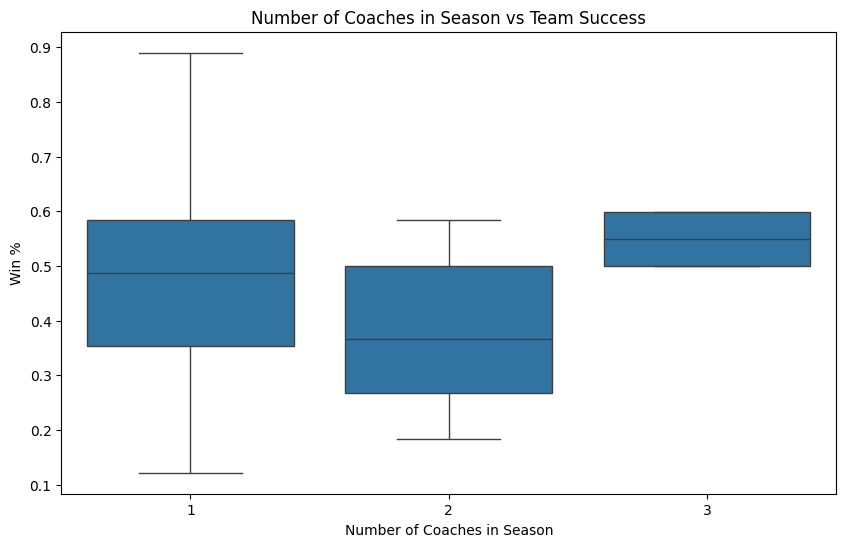

In [108]:
# Coach Tenure vs Team Success
plt.figure(figsize=(10,6))
sns.boxplot(data=master_df, x="Coach_Count", y="WIN%")
plt.title("Number of Coaches in Season vs Team Success")
plt.xlabel("Number of Coaches in Season")
plt.ylabel("Win %")
plt.show()

In [109]:
# 1. Check which seasons are in master_train
print(master_train["Season"].unique())
print("Number of seasons:", master_train["Season"].nunique())

# 2. Count how many teams are in each season
team_counts = master_train.groupby("Season")["Team"].nunique()
print(team_counts)

# 3. Quick check if any seasons are incomplete (less than 30 teams)
incomplete = team_counts[team_counts < 30]
print("\nIncomplete seasons:")
print(incomplete)

[2023 2022 2021 2020 2019 2018 2017 2016]
Number of seasons: 8
Season
2016    24
2017    25
2018    28
2019    28
2020    29
2021    26
2022    27
2023    29
Name: Team, dtype: int64

Incomplete seasons:
Season
2016    24
2017    25
2018    28
2019    28
2020    29
2021    26
2022    27
2023    29
Name: Team, dtype: int64


It seems that some seasons contain fewer than 30 teams due to missing front office or payroll data. This affects coverage of exploratory visualizations.